# PART I. Data Cleaning and Data Manipulation

In [836]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [837]:
import pyreadstat
data, meta = pyreadstat.read_sav('W4_China_merged20181206.sav')

In [838]:
data

,country,year,month,idnumber,region,level,q1,q2,q3,q4,...,ir12c,ir12d,ir12e,ir12f,ir12g,ir12h,ir12i,ir12j,ir13,w
0,4.0,2015.0,7.0,4341112.0,404.0,1.0,2.0,2.0,8.0,5.0,...,4.0,3.0,4.0,3.0,4.0,4.0,4.0,4.0,4.0,0.599908
1,4.0,2015.0,11.0,1112103.0,401.0,2.0,4.0,1.0,2.0,3.0,...,3.0,3.0,3.0,3.0,3.0,2.0,3.0,3.0,1.0,1.756016
2,4.0,2015.0,10.0,1112214.0,401.0,2.0,1.0,1.0,1.0,1.0,...,4.0,3.0,4.0,3.0,4.0,4.0,4.0,3.0,1.0,0.675596
3,4.0,2015.0,11.0,1121110.0,401.0,2.0,2.0,2.0,1.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.756016
4,4.0,2015.0,10.0,1121111.0,401.0,2.0,2.0,2.0,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.389279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063,4.0,2015.0,7.0,6222202.0,406.0,2.0,2.0,2.0,2.0,2.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.754591
4064,4.0,2015.0,7.0,6222203.0,406.0,2.0,2.0,1.0,3.0,3.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.754591
4065,4.0,2015.0,7.0,6222215.0,406.0,2.0,2.0,2.0,8.0,3.0,...,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,0.435997
4066,4.0,2015.0,7.0,6231112.0,406.0,1.0,8.0,2.0,1.0,4.0,...,-1.0,3.0,4.0,3.0,2.0,2.0,3.0,3.0,4.0,0.428662


In [839]:
# ACTUAL AGE
data.se3_2.value_counts()

51.0    118
48.0    108
53.0    104
50.0    103
54.0    102
       ... 
85.0      4
88.0      3
87.0      2
90.0      1
95.0      1
Name: se3_2, Length: 76, dtype: int64

In [840]:
data['age'] = data.se3_2

In [841]:
#Gender
#Male 1
#Female 2
data.se2.value_counts()

2.0    2080
1.0    1988
Name: se2, dtype: int64

In [842]:
data['gender'] = data.se2-1

In [843]:
data.se4.value_counts()

2.0    3324
1.0     413
4.0     265
5.0      32
9.0      18
3.0      16
Name: se4, dtype: int64

In [844]:
data['single'] = np.where(data.se4==2, 0, 1)

In [845]:
#years of education, 99 is NA
data.se5a.value_counts()

9.0     653
0.0     558
6.0     373
8.0     367
12.0    363
5.0     333
3.0     177
7.0     169
16.0    164
4.0     148
15.0    127
2.0     125
11.0    111
10.0     94
14.0     70
13.0     66
99.0     65
1.0      62
18.0     13
17.0     13
20.0     10
19.0      6
22.0      1
Name: se5a, dtype: int64

In [846]:
data['education'] = np.where(data.se5a!=99,data.se5a,np.median(data.se5a[data.se5a!=99]))

SE7a Would you describe yourself as very religious, moderately
religious, lightly religious, not religious at all?
[Ask this question regardless how one answers SE7.]

Very religious 1
Moderately religious 2
Lightly religious 3
Not religious at all 4
[Do not read] Decline to answer 9

In [847]:
data.se7a.value_counts()

0.0    3458
3.0     258
2.0     199
1.0      72
9.0      70
4.0      11
Name: se7a, dtype: int64

In [848]:
data['religiosity'] = np.where((data.se7a<3)&(data.se7a!=9)&(data.se7a>0), 1, 0)
data['religiosity'].value_counts()

0    3797
1     271
Name: religiosity, dtype: int64

SE9e. What is your current status?
□ 01. Homemaker □ 02. Student □ 03. Retired
□ 04. Person with disabilities □ 05. Unemployed □ 06. Other _____

In [849]:
data.se9e.value_counts()

 0.0    3151
 1.0     326
 3.0     325
 2.0     137
 5.0     112
 4.0       7
 6.0       7
-1.0       3
Name: se9e, dtype: int64

In [850]:
data['unemployment'] = np.where(data.se9e==5, 1, 0)
data['unemployment'].value_counts()

0    3956
1     112
Name: unemployment, dtype: int64

9.0    1299
1.0     935
3.0     533
2.0     444
8.0     357
5.0     262
4.0     238
Name: se14, dtype: int64


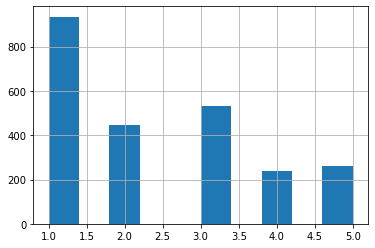

In [851]:
print(data.se14.value_counts())
data.se14[data.se14<8].hist()

In [852]:
data.se14[data.se14<8].median()

2.0

In [853]:
data['income'] = np.where(data.se14>5,data.se14[data.se14<8].median(),data.se14)
data['income'].value_counts()

2.0    2100
1.0     935
3.0     533
5.0     262
4.0     238
Name: income, dtype: int64

SE12 SUBJECTIVE SOCIAL STATUS
People sometimes think of the social status of their families in terms of being high or low.
Imagine a ladder with 10 steps. At step one stand the lowest status and step 10 stand the highest. Where would you place your family on the
following scale? (SHOWCARD)
Highest status 10
Lowest status 01
[Do not read] Can’t choose 98
[Do not read] Decline to answer 99

5.0     1100
6.0      605
4.0      368
3.0      359
98.0     327
7.0      313
8.0      281
2.0      215
1.0      213
10.0     108
99.0      96
9.0       83
Name: se12, dtype: int64


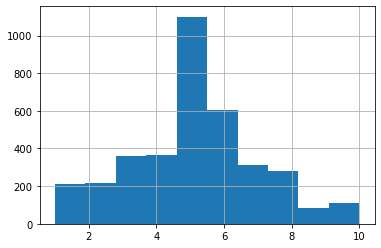

In [854]:
print(data.se12.value_counts())
data.se12[data.se12<11].hist()

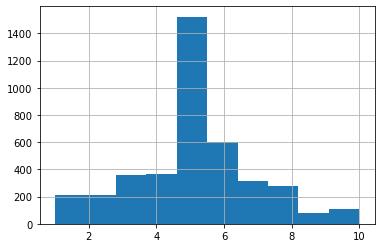

In [855]:
data['sub_social_status'] = np.where(data.se12<11, data.se12, np.median(data.se12[data.se12<11]))
data['sub_social_status'].hist()

IR13. GEOGRAPHIC LOCATION
Which of the following levels within the country the respondent live?
Capital or Megacity (1 million population plus)……………………………………………..1
Regional center or Other major cities (100,000 plus)……………………………………...2
Small city or town (less than 100,000 people)………………………………………………3
Village or countryside………………………………………………………………………….4

In [856]:
data.ir13.value_counts()

 4.0    2657
 3.0     616
 2.0     385
 1.0     361
-1.0      49
Name: ir13, dtype: int64

In [857]:
data['rural'] = np.where(data.ir13==4, 1, 0)
data['rural'].value_counts()

1    2657
0    1411
Name: rural, dtype: int64

SE11a Racial or Ethnic Background (NEW)
What's your racial (ethnic) background? Response categories to
be designed by local teams (Note: If the respondent is born
to a mixed family, we ask the father's side.)

In [858]:
data.se11a.value_counts()

401.0    3695
430.0      61
406.0      56
434.0      30
408.0      27
499.0      27
411.0      23
413.0      21
98.0       19
420.0      18
409.0      17
412.0      16
99.0       15
407.0      14
403.0       9
414.0       6
402.0       4
410.0       3
418.0       2
404.0       2
419.0       1
433.0       1
405.0       1
Name: se11a, dtype: int64

In [859]:
data['eth_minority'] = np.where(data.se11a!=401, 1, 0)
data['eth_minority'].value_counts()

0    3695
1     373
Name: eth_minority, dtype: int64

In [860]:
df = data[list(data.loc[:,'q1':'q6']) +    #evaluation of economic conditions of the country and of the family
     ['q9', 'q15']+                   #trust of central and local govt
     ['q44']+                         #interest in politics 
     list(data.loc[:,'q49':'q52'])+   #use of internet ans social media
     ['q56','q57']+                   #individualism vs collectivism
     list(data.loc[:,'q105':'q109'])+ #ethnical treatment, rich/poor treatment by govt, perception of repression and fear
     list(data.loc[:,'q134':'q136'])+ # political efficacy
     list(data.loc[:,'q155':'q159'])+ # distributive attitudes
     list(data.loc[:,'age':'eth_minority'])+  # demographics
     list(data.loc[:,'q82':'q87'])+ # evaluation of democratic quality and of governmental system
     ['q131']] # one party

In [861]:
df

,q1,q2,q3,q4,q5,q6,q9,q15,q44,q49,...,rural,eth_minority,q82,q82a,q83,q84,q85,q86,q87,q131
0,2.0,2.0,8.0,5.0,3.0,2.0,2.0,3.0,4.0,8.0,...,1,0,1.0,2.0,2.0,7.0,2.0,2.0,8.0,2.0
1,4.0,1.0,2.0,3.0,9.0,1.0,2.0,2.0,2.0,1.0,...,0,0,9.0,0.0,9.0,9.0,9.0,9.0,2.0,9.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,...,0,0,1.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0
3,2.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,...,0,0,2.0,2.0,3.0,3.0,2.0,2.0,2.0,3.0
4,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,0,0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063,2.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,...,0,0,1.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0
4064,2.0,1.0,3.0,3.0,2.0,8.0,1.0,2.0,3.0,7.0,...,0,0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0
4065,2.0,2.0,8.0,3.0,2.0,2.0,2.0,3.0,2.0,1.0,...,0,0,1.0,1.0,8.0,2.0,2.0,2.0,8.0,2.0
4066,8.0,2.0,1.0,4.0,4.0,3.0,1.0,2.0,4.0,8.0,...,1,0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0


In [862]:
df.columns

Index(['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q9', 'q15', 'q44', 'q49', 'q50',
       'q51', 'q52', 'q56', 'q57', 'q105', 'q106', 'q107', 'q108', 'q109',
       'q134', 'q135', 'q136', 'q155', 'q156', 'q157', 'q158', 'q159', 'age',
       'gender', 'single', 'education', 'religiosity', 'unemployment',
       'income', 'sub_social_status', 'rural', 'eth_minority', 'q82', 'q82a',
       'q83', 'q84', 'q85', 'q86', 'q87', 'q131'],
      dtype='object')

In [863]:
df.loc[:,'q1':'q44'] = np.where(df.loc[:,'q1':'q44']>=7,np.nanmedian(df.loc[:,'q1':'q44'][df.loc[:,'q1':'q44']<7],axis=0),
                                                               df.loc[:,'q1':'q44'])

C:\Users\zhong\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [864]:
df.loc[:,'q49'] = np.where(df.loc[:,'q49']>8,np.nanmedian(df.loc[:,'q49'][df.loc[:,'q49']],axis=0),
                                                               df.loc[:,'q49'])

In [865]:
df.loc[:,'q50':'q57'] = np.where(df.loc[:,'q50':'q57']>=7,
                                 np.nanmedian(df.loc[:,'q50':'q57'][df.loc[:,'q50':'q57']<7],axis=0),
                                                               df.loc[:,'q50':'q57'])

In [866]:
df.loc[:,'q105':'q159'] = np.where(df.loc[:,'q105':'q159']>=5,
                                 np.nanmedian(df.loc[:,'q105':'q159'][df.loc[:,'q105':'q159']<5],axis=0),
                                                               df.loc[:,'q105':'q159'])

In [867]:
df.loc[:,'q1':'q159']

,q1,q2,q3,q4,q5,q6,q9,q15,q44,q49,...,q108,q109,q134,q135,q136,q155,q156,q157,q158,q159
0,2.0,2.0,2.0,5.0,3.0,2.0,2.0,3.0,4.0,8.0,...,2.0,2.0,3.0,2.0,2.0,3.0,2.0,2.0,1.0,2.0
1,4.0,1.0,2.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,...,3.0,3.0,2.0,3.0,3.0,3.0,1.0,1.0,2.0,3.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,7.0,...,3.0,2.0,2.0,2.0,4.0,3.0,2.0,1.0,1.0,2.0
3,2.0,2.0,1.0,3.0,2.0,1.0,2.0,2.0,2.0,1.0,...,3.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0,3.0,1.0
4,2.0,2.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,3.0,4.0,2.0,2.0,3.0,3.0,3.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063,2.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0,2.0,1.0,...,2.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,2.0
4064,2.0,1.0,3.0,3.0,2.0,2.0,1.0,2.0,3.0,7.0,...,3.0,3.0,3.0,2.0,2.0,2.0,3.0,1.0,2.0,2.0
4065,2.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,2.0,1.0,...,2.0,3.0,3.0,3.0,2.0,4.0,1.0,1.0,2.0,4.0
4066,2.0,2.0,1.0,4.0,4.0,3.0,1.0,2.0,4.0,8.0,...,2.0,2.0,4.0,2.0,2.0,3.0,2.0,4.0,1.0,4.0


In [868]:
#to inverse the order of the answers
df.loc[:,'q1':'q57'] = -df.loc[:,'q1':'q57'] 

C:\Users\zhong\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [869]:
df.loc[:,'q105':'q109'] = 5-df.loc[:,'q105':'q109']

In [870]:
df.loc[:,'q134':'q136'] = 5-df.loc[:,'q134':'q136']

In [871]:
df.loc[:,'q155':'q159'] = 5-df.loc[:,'q155':'q159']

In [872]:
df.columns

Index(['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q9', 'q15', 'q44', 'q49', 'q50',
       'q51', 'q52', 'q56', 'q57', 'q105', 'q106', 'q107', 'q108', 'q109',
       'q134', 'q135', 'q136', 'q155', 'q156', 'q157', 'q158', 'q159', 'age',
       'gender', 'single', 'education', 'religiosity', 'unemployment',
       'income', 'sub_social_status', 'rural', 'eth_minority', 'q82', 'q82a',
       'q83', 'q84', 'q85', 'q86', 'q87', 'q131'],
      dtype='object')

In [873]:
df.loc[:,'election'] = np.where((df.q82==1)&(df.q82a==1), 4, 
                         np.where((df.q82==1)&(df.q82a==2), 3,
                                 np.where((df.q82==2)&(df.q82a==2), 2,
                                         np.where((df.q82==2)&(df.q82a==1), 1, np.nan))))
df.loc[:,'election_imputed_median'] = np.where(np.isnan(df['election']), np.nanmedian(df['election']), df['election']) 
df.election_imputed_median.value_counts()

C:\Users\zhong\Anaconda3\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


3.0    2488
4.0     953
2.0     489
1.0     138
Name: election_imputed_median, dtype: int64

In [874]:
#'q83', 'q84', 'q85', 'q86', 'q87', 'q131'

In [875]:
df.loc[:,'q83':'q131'] = np.where(df.loc[:,'q83':'q131']>=5, np.nan,
                                  df.loc[:,'q83':'q131'])

In [876]:
# make invalid answers as NAs while adding more columns with the NAs replaced by the medians
columns = ['sys_capable_solving_probs',
  'proud_of_sys',
   'sys_deserves_support',
   'rather_live_this_than_other',
   'sys_changes_needed',
   'multi-party']

df_add = pd.DataFrame(data=np.where(np.isnan(df.loc[:,'q83':'q131']), 
                                         np.nanmedian(df.loc[:,'q83':'q131'][df.loc[:,'q83':'q131']<5]),
                                         df.loc[:,'q83':'q131']),columns=columns)

In [877]:
df = pd.concat([df,df_add], axis=1)

In [878]:
df.loc[:,'q83':'q86'] = 5-df.loc[:,'q83':'q86']
df.loc[:,'sys_capable_solving_probs':'rather_live_this_than_other'] = 5-df.loc[:,'sys_capable_solving_probs':'rather_live_this_than_other']

In [879]:
df

,q1,q2,q3,q4,q5,q6,q9,q15,q44,q49,...,q87,q131,election,election_imputed_median,sys_capable_solving_probs,proud_of_sys,sys_deserves_support,rather_live_this_than_other,sys_changes_needed,multi-party
0,-2.0,-2.0,-2.0,-5.0,-3.0,-2.0,-2.0,-3.0,-4.0,-8.0,...,NaN,2.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0
1,-4.0,-1.0,-2.0,-3.0,-2.0,-1.0,-2.0,-2.0,-2.0,-1.0,...,2.0,NaN,NaN,3.0,3.0,3.0,3.0,3.0,2.0,2.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-7.0,...,2.0,1.0,4.0,4.0,3.0,4.0,2.0,4.0,2.0,1.0
3,-2.0,-2.0,-1.0,-3.0,-2.0,-1.0,-2.0,-2.0,-2.0,-1.0,...,2.0,3.0,2.0,2.0,2.0,2.0,3.0,3.0,2.0,3.0
4,-2.0,-2.0,-3.0,-3.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,...,2.0,2.0,3.0,3.0,3.0,3.0,3.0,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4063,-2.0,-2.0,-2.0,-2.0,-3.0,-1.0,-2.0,-2.0,-2.0,-1.0,...,2.0,2.0,3.0,3.0,3.0,3.0,2.0,4.0,2.0,2.0
4064,-2.0,-1.0,-3.0,-3.0,-2.0,-2.0,-1.0,-2.0,-3.0,-7.0,...,2.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0,3.0
4065,-2.0,-2.0,-2.0,-3.0,-2.0,-2.0,-2.0,-3.0,-2.0,-1.0,...,NaN,2.0,4.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0
4066,-2.0,-2.0,-1.0,-4.0,-4.0,-3.0,-1.0,-2.0,-4.0,-8.0,...,2.0,1.0,4.0,4.0,4.0,4.0,4.0,3.0,2.0,1.0


# PART II . Use Lasso to Explore the Possible Effects of Predictors

In [880]:
# standardize the predictors
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import validation_curve

In [882]:
df.loc[:,'q1':'q159'] = StandardScaler().fit_transform(df.loc[:,'q1':'q159'])

In [883]:
def plot_cross_validation_curve(param_range, train_scores, test_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    #Plot CV error as a function of alpha
    plt.title("Validation Curve")
    plt.xlabel("Parameter")
    plt.ylabel("Score")
    lw = 2
    plt.plot(param_range, train_scores_mean, label="Training score",
                 color="darkorange", lw=lw)
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2,
                     color="darkorange", lw=lw)
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="navy", lw=lw)
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2,
                     color="navy", lw=lw)
    plt.legend(loc="best")
    plt.show()
    parameter_best = param_range[np.argmax(test_scores_mean)]
    print('The best parameter is:', 
          parameter_best)
    return parameter_best

In [884]:
def parameter_cross_validation(param_range, train_scores, test_scores):
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    parameter_best = param_range[np.argmax(test_scores_mean)]
    
    return parameter_best

In [885]:
lassoRegr = Lasso(max_iter = 10000)
alphas = np.logspace(-15, -1, 100)
train_scores, test_scores = validation_curve(
    lassoRegr, X_train, y_train, cv=5, param_name="alpha", param_range=alphas,
    scoring="neg_root_mean_squared_error")

best_para = parameter_cross_validation(alphas, train_scores, test_scores)

In [886]:
best_lassoRegr = Lasso(max_iter = 10000, alpha = best_para)
best_lassoRegr.fit(X_train, y_train)
y_pred_lasso = best_lassoRegr.predict(X_test)

coefficients_lasso = pd.DataFrame(best_lassoRegr.coef_, index=X_train.columns)
coefficients_lasso.rename(columns={coefficients_lasso.columns[0]: "Coefficient" }, \
                                   inplace = True)

coefficients_lasso[(coefficients_lasso != 0)].sort_values(by='Coefficient',ascending=True)

,Coefficient
q49,-0.035430
q2,-0.008670
q157,-0.008420
q134,-0.004106
age,-0.003061
q106,0.001068
q155,0.002517
q159,0.003227
sub_social_status,0.004145
income,0.005772


In [887]:
df.columns

Index(['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q9', 'q15', 'q44', 'q49', 'q50',
       'q51', 'q52', 'q56', 'q57', 'q105', 'q106', 'q107', 'q108', 'q109',
       'q134', 'q135', 'q136', 'q155', 'q156', 'q157', 'q158', 'q159', 'age',
       'gender', 'single', 'education', 'religiosity', 'unemployment',
       'income', 'sub_social_status', 'rural', 'eth_minority', 'q82', 'q82a',
       'q83', 'q84', 'q85', 'q86', 'q87', 'q131', 'election',
       'election_imputed_median', 'sys_capable_solving_probs', 'proud_of_sys',
       'sys_deserves_support', 'rather_live_this_than_other',
       'sys_changes_needed', 'multi-party'],
      dtype='object')

In [888]:
predictors = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q9', 'q15', 'q44', 'q49', 'q50',
       'q51', 'q52', 'q56', 'q57', 'q105', 'q106', 'q107', 'q108', 'q109',
       'q134', 'q135', 'q136', 'q155', 'q156', 'q157', 'q158', 'q159', 'age',
       'gender', 'single', 'education', 'religiosity', 'income',
       'unemployment', 'sub_social_status', 'rural', 'eth_minority']

In [889]:
# same question for each row, 1st uses listwise deletion, 2nd uses median imputation
dependent_variables = list(['election', 'election_imputed_median', 
                            'q83', 'sys_capable_solving_probs',
                            'q84', 'proud_of_sys',
                            'q85', 'sys_deserves_support',
                            'q86', 'rather_live_this_than_other',
                            'q87', 'sys_changes_needed', 
                            'q131', 'multi-party'])

In [890]:
# the following codes will write a function that will produce the lasso cofficients for all the dependent variables
def produce_lasso_table_for_DVs():

    output_table = pd.DataFrame({'Question':predictors})

    for dv in dependent_variables:
        # corresponding observations in X will need to be deleted as well if y is not imputed by median and contains NAs 
        X_y = df[~np.isnan(df[dv])] 
        X = X_y.loc[:,'q1':'eth_minority']
        y = X_y.loc[:,dv]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

        lassoRegr = Lasso(max_iter = 10000)
        alphas = np.logspace(-15, -1, 100)
        
        #use 5 fold CV to choose the best parameter for alpha
        train_scores, test_scores = validation_curve(
            lassoRegr, X_train, y_train, cv=5, param_name="alpha", param_range=alphas,
            scoring="neg_root_mean_squared_error")

        best_para = parameter_cross_validation(alphas, train_scores, test_scores)

        best_lassoRegr = Lasso(max_iter = 10000, alpha = best_para)
        best_lassoRegr.fit(X_train, y_train)
        y_pred_lasso = best_lassoRegr.predict(X_test)   

        coefficients_lasso = pd.DataFrame(best_lassoRegr.coef_, index=X_train.columns)
        coefficients_lasso.reset_index(inplace=True)
        coefficients_lasso.rename(columns={coefficients_lasso.columns[0]: 'Question',
                                       coefficients_lasso.columns[1]: dv}, \
                                          inplace = True)

        output_table = output_table.merge(coefficients_lasso, left_on='Question', right_on='Question')
    
    output_table.replace(0, np.nan, inplace=True)
    
    return output_table
    

In [891]:
output = produce_lasso_table_for_DVs()
output

,Question,election,election_imputed_median,q83,sys_capable_solving_probs,q84,proud_of_sys,q85,sys_deserves_support,q86,rather_live_this_than_other,q87,sys_changes_needed,q131,multi-party
0,q1,-0.018076,-0.014705,0.028842,0.020317,0.025493,0.018527,0.018562,0.017120,0.027146,0.008141,-0.052669,-0.033303,-0.012272,-0.006780
1,q2,0.000124,NaN,0.001752,NaN,NaN,0.006879,NaN,NaN,NaN,NaN,-0.011502,NaN,NaN,0.008670
2,q3,-0.026673,NaN,0.009814,NaN,0.018698,0.018560,NaN,NaN,0.013061,0.012955,NaN,-0.013476,-0.000494,-0.011191
3,q4,NaN,NaN,0.002996,NaN,NaN,0.003450,NaN,0.007495,NaN,NaN,NaN,NaN,NaN,NaN
4,q5,0.000421,NaN,0.005465,NaN,-0.002570,NaN,-0.009886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,q6,NaN,-0.007241,NaN,NaN,NaN,-0.005542,NaN,-0.011179,NaN,NaN,-0.001675,NaN,NaN,NaN
6,q9,0.026326,NaN,0.036165,0.037527,0.063366,0.047308,0.031981,0.034120,0.039750,0.042485,-0.020377,-0.014825,-0.072009,-0.044750
7,q15,NaN,NaN,0.026813,0.018040,0.023135,0.020830,0.017192,0.014266,0.006205,NaN,-0.083961,-0.078164,NaN,NaN
8,q44,NaN,0.002971,NaN,NaN,0.001780,0.007288,0.005606,0.000253,NaN,NaN,-0.000426,NaN,NaN,NaN
9,q49,NaN,NaN,NaN,NaN,-0.009388,-0.038095,NaN,0.011606,-0.018925,-0.014545,NaN,0.030612,0.026954,0.035430


In [892]:
output.to_csv("output1.csv")

In [ ]:
#--------------------------

In [721]:
outputtable = output.copy()

In [722]:
outputtable.columns = ['Question',
                      'election_listwise', 'imputed', 
                      'sys_capable_solving_probs', 'imputed',
                      'proud_of_sys', 'imputed',
                      'sys_deserves_support', 'imputed',
                      'rather_live_this_than_other', 'imputed',
                      'sys_changes_needed', 'imputed', 
                      'multi-party', 'imputed']

# PART III. Binary Predictions using Logistic, SVM, and KNN

In [935]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [894]:
# this part of the project will work to predict people who have extreme attitudes 
df.columns

Index(['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q9', 'q15', 'q44', 'q49', 'q50',
       'q51', 'q52', 'q56', 'q57', 'q105', 'q106', 'q107', 'q108', 'q109',
       'q134', 'q135', 'q136', 'q155', 'q156', 'q157', 'q158', 'q159', 'age',
       'gender', 'single', 'education', 'religiosity', 'unemployment',
       'income', 'sub_social_status', 'rural', 'eth_minority', 'q82', 'q82a',
       'q83', 'q84', 'q85', 'q86', 'q87', 'q131', 'election',
       'election_imputed_median', 'sys_capable_solving_probs', 'proud_of_sys',
       'sys_deserves_support', 'rather_live_this_than_other',
       'sys_changes_needed', 'multi-party'],
      dtype='object')

## people who would support multi-party system

In [1180]:
df['q131'].value_counts()

2.0    1881
3.0     801
1.0     404
4.0      95
Name: q131, dtype: int64

In [1176]:
#X_y = df[~np.isnan(df['multi_party_extreme'])] 
X_y = df[~np.isnan(df['q131'])] 

X_y['multi_party_extreme'] = np.where(X_y['q131']>=3, 1, -1)

X_y['multi_party_extreme'].value_counts()

X = X_y.loc[:,'q1':'eth_minority']
y = X_y['multi_party_extreme']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

<ipython-input-1176-9813b93a49fd>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_y['multi_party_extreme'] = np.where(X_y['q131']>=3, 1, -1)


In [1173]:
y.value_counts()

-1    2094
 1     816
Name: extreme_changes_of_system, dtype: int64

### SVM 

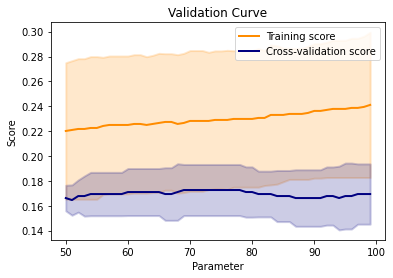

The best parameter is: 69


69

In [995]:
param_range = [*range(50,100)]
train_scores, test_scores = validation_curve(estimator=SVC(),
                                             X=X_train,y=y_train,cv=3,\
                                             param_name="C",
                                             scoring="f1",
                                             #scoring="recall",
                                             param_range=param_range)

plot_cross_validation_curve(param_range, train_scores, test_scores)

best_para = parameter_cross_validation(param_range, train_scores, test_scores)
svm = SVC(C=best_para)
#svm = SVC(C=best_para,kernel='poly')
svm.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, svm.predict(X_test))
print(test_accuracy)
plot_confusion_matrix(svm, X_test, y_test)  
plt.show()
print(classification_report(y_test, svm.predict(X_test)))

### KNN

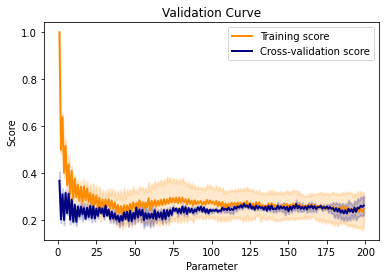

The best parameter is: 1
0.6418848167539267


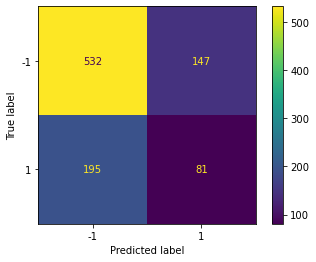

              precision    recall  f1-score   support

          -1       0.73      0.78      0.76       679
           1       0.36      0.29      0.32       276

    accuracy                           0.64       955
   macro avg       0.54      0.54      0.54       955
weighted avg       0.62      0.64      0.63       955



In [1060]:
KNN = KNeighborsClassifier
param_range = [*range(1,200)]
train_scores, test_scores = validation_curve(estimator=KNN(),\
                                             X=X_train,y=y_train,cv=3,\
                                             param_name="n_neighbors",scoring="f1",
                                             param_range=param_range)
plot_cross_validation_curve(param_range, train_scores, test_scores)
best_para = parameter_cross_validation(param_range, train_scores, test_scores)

KNN = KNeighborsClassifier(n_neighbors=best_para)
KNN.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, KNN.predict(X_test))
print(test_accuracy)
plot_confusion_matrix(KNN, X_test, y_test)  
plt.show()
print(classification_report(y_test, KNN.predict(X_test)))

### Logistic 

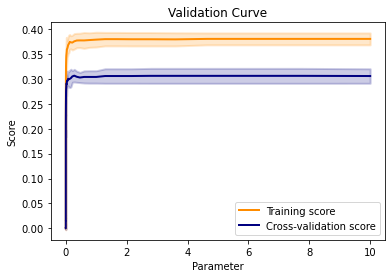

The best parameter is: 0.2782559402207126
0.7277486910994765


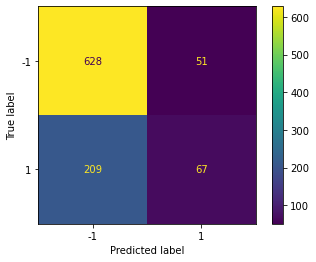

              precision    recall  f1-score   support

          -1       0.75      0.92      0.83       679
           1       0.57      0.24      0.34       276

    accuracy                           0.73       955
   macro avg       0.66      0.58      0.58       955
weighted avg       0.70      0.73      0.69       955



In [1059]:
logisticRegr = LogisticRegression(max_iter=10000)
param_range = np.logspace(-10,1, 100)
train_scores, test_scores = validation_curve(estimator=logisticRegr,\
                                             X=X_train,y=y_train,cv=3,\
                                             param_name="C",scoring="f1",
                                             param_range=param_range)
plot_cross_validation_curve(param_range, train_scores, test_scores)

best_para = parameter_cross_validation(param_range, train_scores, test_scores)

logisticRegr = LogisticRegression(max_iter=10000, C=best_para)
logisticRegr.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, logisticRegr.predict(X_test))
print(test_accuracy)
plot_confusion_matrix(logisticRegr, X_test, y_test)  
plt.show()
print(classification_report(y_test, logisticRegr.predict(X_test)))

### Random Forest Classifier

In [ ]:
rf_clf = RandomForestClassifier()

param_range = [*range(1,100)]
train_scores, test_scores = validation_curve(estimator=rf_clf,\
                                             X=X_train,y=y_train,cv=3,\
                                             param_name="n_estimators",
                                             scoring="recall",
                                             param_range=param_range)

plot_cross_validation_curve(param_range, train_scores, test_scores)

best_para = parameter_cross_validation(param_range, train_scores, test_scores)

rf_clf = RandomForestClassifier(n_estimators=best_para)
rf_clf.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, rf_clf.predict(X_test))
print(test_accuracy)
plot_confusion_matrix(rf_clf, X_test, y_test)  
plt.show()
print(classification_report(y_test, rf_clf.predict(X_test)))

## predict people who think major change or replacement is needed for system of gov't

In [1166]:
df['q87'].value_counts()

2.0    1720
3.0     562
1.0     374
4.0     254
Name: q87, dtype: int64

In [1172]:
(562+254)/(4068)

0.20058997050147492

In [1119]:
# to do the prediction on another output variable sys_changes_needed

#X_y = df[~np.isnan(df['sys_changes_needed'])] 
#X_y['extreme_changes_of_system'] = np.where(X_y['sys_changes_needed']>=3, 1, -1)

X_y = df[~np.isnan(df['q87'])] 
X_y['extreme_changes_of_system'] = np.where(X_y['q87']>=3, 1, -1)

X_y['extreme_changes_of_system'].value_counts()

X = X_y.loc[:,'q1':'eth_minority']
y = X_y['extreme_changes_of_system']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

<ipython-input-1119-43d34754823b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_y['extreme_changes_of_system'] = np.where(X_y['q87']>=3, 1, -1)


### SVM 

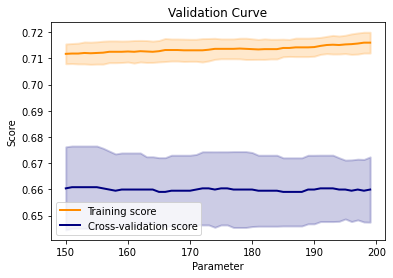

The best parameter is: 151
0.6565445026178011


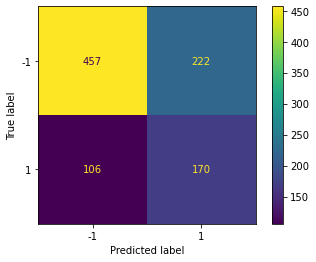

              precision    recall  f1-score   support

          -1       0.81      0.67      0.74       679
           1       0.43      0.62      0.51       276

    accuracy                           0.66       955
   macro avg       0.62      0.64      0.62       955
weighted avg       0.70      0.66      0.67       955



In [1204]:
param_range = [*range(150,200)]
train_scores, test_scores = validation_curve(estimator=SVC(class_weight='balanced'),
                                             X=X_train,y=y_train,cv=5,\
                                             param_name="C",
                                             scoring="accuracy",
                                             #scoring="f1",
                                             #scoring="recall",
                                             #scoring='precision',
                                             param_range=param_range)

plot_cross_validation_curve(param_range, train_scores, test_scores)

best_para = parameter_cross_validation(param_range, train_scores, test_scores)
svm = SVC(C=best_para,class_weight='balanced')
svm.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, svm.predict(X_test))
print(test_accuracy)
plot_confusion_matrix(svm, X_test, y_test)  
plt.show()
print(classification_report(y_test, svm.predict(X_test)))

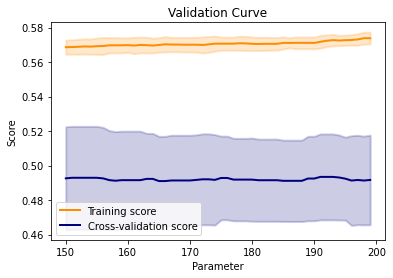

The best parameter is: 191
0.6575916230366492


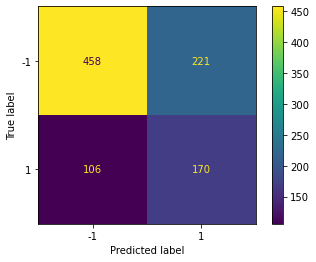

              precision    recall  f1-score   support

          -1       0.81      0.67      0.74       679
           1       0.43      0.62      0.51       276

    accuracy                           0.66       955
   macro avg       0.62      0.65      0.62       955
weighted avg       0.70      0.66      0.67       955



In [1205]:
param_range = [*range(150,200)]
train_scores, test_scores = validation_curve(estimator=SVC(class_weight='balanced'),
                                             X=X_train,y=y_train,cv=5,\
                                             param_name="C",
                                             #scoring="accuracy",
                                             scoring="f1",
                                             #scoring="recall",
                                             #scoring='precision',
                                             param_range=param_range)

plot_cross_validation_curve(param_range, train_scores, test_scores)

best_para = parameter_cross_validation(param_range, train_scores, test_scores)
svm = SVC(C=best_para,class_weight='balanced')
svm.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, svm.predict(X_test))
print(test_accuracy)
plot_confusion_matrix(svm, X_test, y_test)  
plt.show()
print(classification_report(y_test, svm.predict(X_test)))

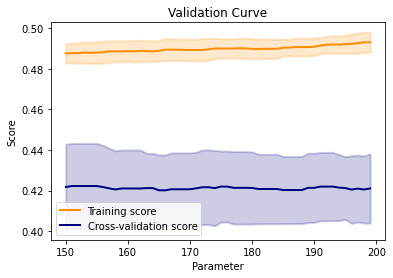

The best parameter is: 151
0.6565445026178011


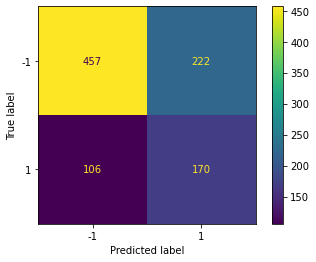

              precision    recall  f1-score   support

          -1       0.81      0.67      0.74       679
           1       0.43      0.62      0.51       276

    accuracy                           0.66       955
   macro avg       0.62      0.64      0.62       955
weighted avg       0.70      0.66      0.67       955



In [1206]:
param_range = [*range(150,200)]
train_scores, test_scores = validation_curve(estimator=SVC(class_weight='balanced'),
                                             X=X_train,y=y_train,cv=5,\
                                             param_name="C",
                                             #scoring="accuracy",
                                             #scoring="f1",
                                             scoring='precision',
                                             param_range=param_range)

plot_cross_validation_curve(param_range, train_scores, test_scores)

best_para = parameter_cross_validation(param_range, train_scores, test_scores)
svm = SVC(C=best_para,class_weight='balanced')
svm.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, svm.predict(X_test))
print(test_accuracy)
plot_confusion_matrix(svm, X_test, y_test)  
plt.show()
print(classification_report(y_test, svm.predict(X_test)))

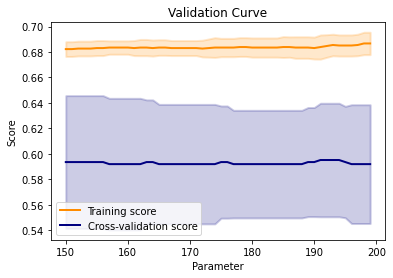

The best parameter is: 191
0.6575916230366492


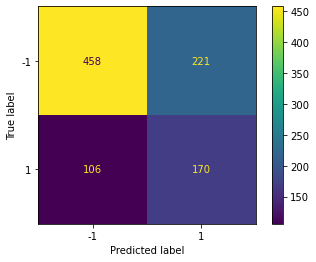

              precision    recall  f1-score   support

          -1       0.81      0.67      0.74       679
           1       0.43      0.62      0.51       276

    accuracy                           0.66       955
   macro avg       0.62      0.65      0.62       955
weighted avg       0.70      0.66      0.67       955



In [1207]:
param_range = [*range(150,200)]
train_scores, test_scores = validation_curve(estimator=SVC(class_weight='balanced'),
                                             X=X_train,y=y_train,cv=5,\
                                             param_name="C",
                                             #scoring="accuracy",
                                             #scoring="f1",
                                             #scoring="recall",
                                             scoring='recall',
                                             param_range=param_range)

plot_cross_validation_curve(param_range, train_scores, test_scores)

best_para = parameter_cross_validation(param_range, train_scores, test_scores)
svm = SVC(C=best_para,class_weight='balanced')
svm.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, svm.predict(X_test))
print(test_accuracy)
plot_confusion_matrix(svm, X_test, y_test)  
plt.show()
print(classification_report(y_test, svm.predict(X_test)))

### KNN 

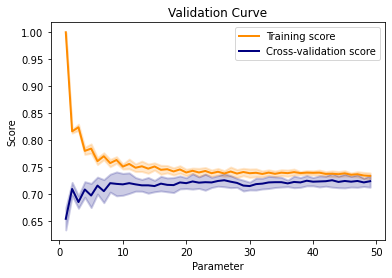

The best parameter is: 43
0.6984293193717277


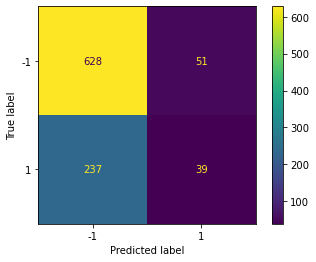

              precision    recall  f1-score   support

          -1       0.73      0.92      0.81       679
           1       0.43      0.14      0.21       276

    accuracy                           0.70       955
   macro avg       0.58      0.53      0.51       955
weighted avg       0.64      0.70      0.64       955



In [1217]:
KNN = KNeighborsClassifier
param_range = [*range(1,50)]
train_scores, test_scores = validation_curve(estimator=KNN(),\
                                             X=X_train,y=y_train,cv=5,\
                                             param_name="n_neighbors",
                                             scoring = 'accuracy',
                                             #scoring="f1",
                                             #scoring='recall',
                                             #scoring = 'precision',
                                             param_range=param_range)
plot_cross_validation_curve(param_range, train_scores, test_scores)
best_para = parameter_cross_validation(param_range, train_scores, test_scores)

KNN = KNeighborsClassifier(n_neighbors=best_para)
KNN.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, KNN.predict(X_test))
print(test_accuracy)
plot_confusion_matrix(KNN, X_test, y_test)  
plt.show()
print(classification_report(y_test, KNN.predict(X_test)))

### Logistic Regression 

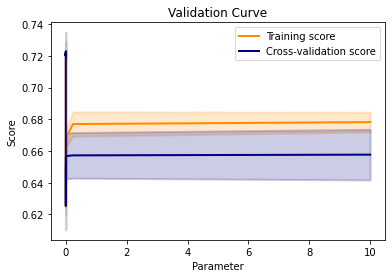

The best parameter is: 7.847599703514623e-26
0.7109947643979058


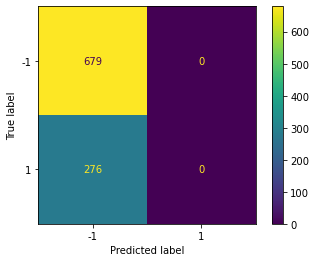

              precision    recall  f1-score   support

          -1       0.71      1.00      0.83       679
           1       0.00      0.00      0.00       276

    accuracy                           0.71       955
   macro avg       0.36      0.50      0.42       955
weighted avg       0.51      0.71      0.59       955



C:\Users\zhong\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1220]:
logisticRegr = LogisticRegression(max_iter=10000,class_weight='balanced')
param_range = np.logspace(-30,1, 10)
train_scores, test_scores = validation_curve(estimator=logisticRegr,\
                                             X=X_train,y=y_train,cv=5,\
                                             param_name="C",
                                             scoring="accuracy",
                                             #scoring="f1",
                                             #scoring="precision",
                                             #scoring="recall",
                                             param_range=param_range)
plot_cross_validation_curve(param_range, train_scores, test_scores)

best_para = parameter_cross_validation(param_range, train_scores, test_scores)

logisticRegr = LogisticRegression(max_iter=10000, C=best_para,class_weight='balanced')
logisticRegr.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, logisticRegr.predict(X_test))
print(test_accuracy)
plot_confusion_matrix(logisticRegr, X_test, y_test)  
plt.show()
print(classification_report(y_test, logisticRegr.predict(X_test)))

###  Random Forest Classifier

In [1092]:
from sklearn.ensemble import RandomForestClassifier

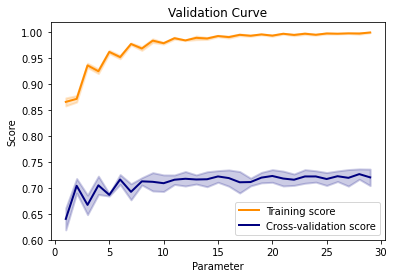

The best parameter is: 28
0.7130890052356021


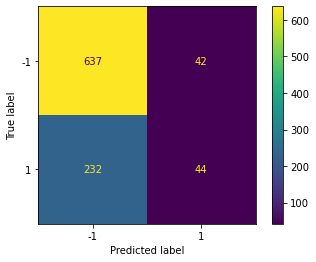

              precision    recall  f1-score   support

          -1       0.73      0.94      0.82       679
           1       0.51      0.16      0.24       276

    accuracy                           0.71       955
   macro avg       0.62      0.55      0.53       955
weighted avg       0.67      0.71      0.66       955



In [1221]:
rf_clf = RandomForestClassifier(class_weight='balanced')

param_range = [*range(1,30)]
train_scores, test_scores = validation_curve(estimator=rf_clf,\
                                             X=X_train,y=y_train,cv=5,\
                                             param_name="n_estimators",
                                             scoring="accuracy",
                                             #scoring="precision",
                                             #scoring="recall",
                                             #scoring="f1",
                                             param_range=param_range)

plot_cross_validation_curve(param_range, train_scores, test_scores)

best_para = parameter_cross_validation(param_range, train_scores, test_scores)

rf_clf = RandomForestClassifier(n_estimators=best_para, class_weight='balanced')
rf_clf.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, rf_clf.predict(X_test))
print(test_accuracy)
plot_confusion_matrix(rf_clf, X_test, y_test)  
plt.show()
print(classification_report(y_test, rf_clf.predict(X_test)))

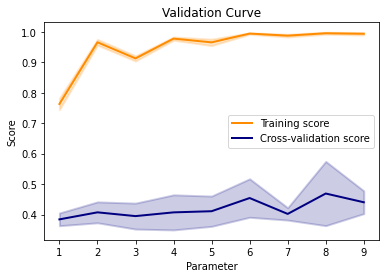

The best parameter is: 8
0.6931937172774869


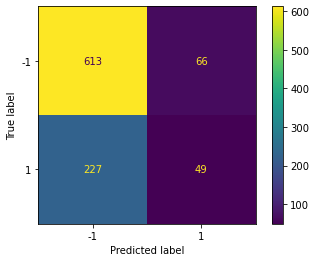

              precision    recall  f1-score   support

          -1       0.73      0.90      0.81       679
           1       0.43      0.18      0.25       276

    accuracy                           0.69       955
   macro avg       0.58      0.54      0.53       955
weighted avg       0.64      0.69      0.65       955



In [1209]:
rf_clf = RandomForestClassifier(class_weight='balanced')

param_range = [*range(1,10)]
train_scores, test_scores = validation_curve(estimator=rf_clf,\
                                             X=X_train,y=y_train,cv=5,\
                                             param_name="n_estimators",
                                             #scoring="accuracy",
                                             scoring="precision",
                                             #scoring="recall",
                                             #scoring="f1",
                                             param_range=param_range)

plot_cross_validation_curve(param_range, train_scores, test_scores)

best_para = parameter_cross_validation(param_range, train_scores, test_scores)

rf_clf = RandomForestClassifier(n_estimators=best_para, class_weight='balanced')
rf_clf.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, rf_clf.predict(X_test))
print(test_accuracy)
plot_confusion_matrix(rf_clf, X_test, y_test)  
plt.show()
print(classification_report(y_test, rf_clf.predict(X_test)))

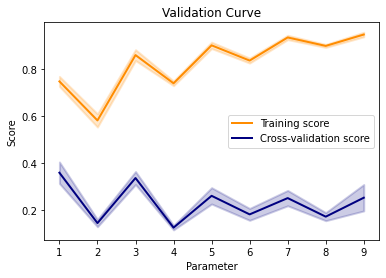

The best parameter is: 1
0.631413612565445


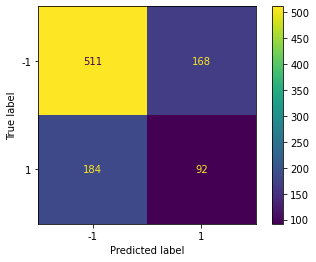

              precision    recall  f1-score   support

          -1       0.74      0.75      0.74       679
           1       0.35      0.33      0.34       276

    accuracy                           0.63       955
   macro avg       0.54      0.54      0.54       955
weighted avg       0.63      0.63      0.63       955



In [1210]:
rf_clf = RandomForestClassifier(class_weight='balanced')

param_range = [*range(1,10)]
train_scores, test_scores = validation_curve(estimator=rf_clf,\
                                             X=X_train,y=y_train,cv=5,\
                                             param_name="n_estimators",
                                             #scoring="accuracy",
                                             #scoring="precision",
                                             scoring="recall",
                                             #scoring="f1",
                                             param_range=param_range)

plot_cross_validation_curve(param_range, train_scores, test_scores)

best_para = parameter_cross_validation(param_range, train_scores, test_scores)

rf_clf = RandomForestClassifier(n_estimators=best_para, class_weight='balanced')
rf_clf.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, rf_clf.predict(X_test))
print(test_accuracy)
plot_confusion_matrix(rf_clf, X_test, y_test)  
plt.show()
print(classification_report(y_test, rf_clf.predict(X_test)))

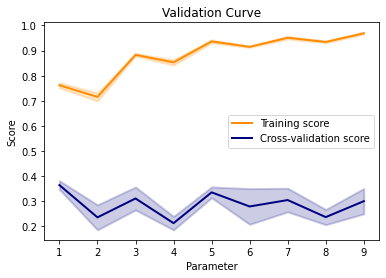

The best parameter is: 1
0.6397905759162303


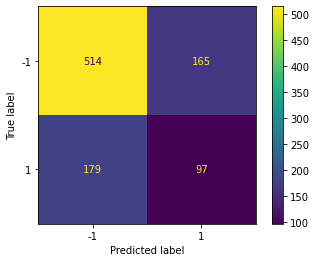

              precision    recall  f1-score   support

          -1       0.74      0.76      0.75       679
           1       0.37      0.35      0.36       276

    accuracy                           0.64       955
   macro avg       0.56      0.55      0.55       955
weighted avg       0.63      0.64      0.64       955



In [1211]:
rf_clf = RandomForestClassifier(class_weight='balanced')

param_range = [*range(1,10)]
train_scores, test_scores = validation_curve(estimator=rf_clf,\
                                             X=X_train,y=y_train,cv=5,\
                                             param_name="n_estimators",
                                             #scoring="accuracy",
                                             #scoring="precision",
                                             #scoring="recall",
                                             scoring="f1",
                                             param_range=param_range)

plot_cross_validation_curve(param_range, train_scores, test_scores)

best_para = parameter_cross_validation(param_range, train_scores, test_scores)

rf_clf = RandomForestClassifier(n_estimators=best_para, class_weight='balanced')
rf_clf.fit(X_train, y_train)
test_accuracy = accuracy_score(y_test, rf_clf.predict(X_test))
print(test_accuracy)
plot_confusion_matrix(rf_clf, X_test, y_test)  
plt.show()
print(classification_report(y_test, rf_clf.predict(X_test)))

In [1227]:
jupyter nbconvert --to html Final Project, Financial Data Analysis.ipynb
pandoc -s Final Project, Financial Data Analysis.html -o my_notebook.docx

SyntaxError: invalid syntax (<ipython-input-1227-07402810783e>, line 1)